In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option

In [2]:
# Read Data
filename = r'001_Data_TA_7_Well_Process.csv'
df = pd.read_csv(filename)

In [3]:
# Ubah Spesifikasi Tipe Data
df['Formation'] = df['Formation'].astype('category')
df['Well Name'] = df['Well Name'].astype('category')

In [4]:
# Check Jumlah Well
df['Well Name'].unique()

[SHRIMPLIN, SHANKLE, LUKE G U, CROSS H CATTLE, NOLAN, NEWBY, CHURCHMAN BIBLE]
Categories (7, object): [SHRIMPLIN, SHANKLE, LUKE G U, CROSS H CATTLE, NOLAN, NEWBY, CHURCHMAN BIBLE]

In [5]:
data = df

In [6]:
#Membuat library Labelling pada tiap facies untuk warna dan Label nya

facies_colors = ['#F4D03F','#F5B041','#DC7633','#6E2C00','#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS','CSiS','FSiS','SiSh','MS','WS','D','PS','BS']

#facies_color_map adalah kamus untuk memetakan facies labels ke warnanya masing-masing

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]

data.loc[:,'Facies_Labels'] = data.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [7]:
# Define Plot Data
# Log dan Facies di Tiap Well

def plot_log(data, facies_colors):
    # Melakukan sorting data log berdasarkan Depth
    data = data.sort_values(by=['Depth'])
    # cmap_facies used to create colormap objects from a list of colors
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)],'indexed')
    fig,ax = plt.subplots(nrows=1, ncols=7, figsize=(15,12), sharey=True)
    
    for axes in ax:
        axes.invert_yaxis()
        axes.get_xaxis().set_visible(False)
        
        # Plot Log Track 1 = GR Log
        try:
            ax01=ax[0].twiny()
            ax01.set_xlim(0,300) #Batas rentangan log pada sumbu X
            ax01.plot(data['GR'], data['Depth'], label='GR [API]', color='green')
            ax01.grid(True)
        except:
            pass
        ax01.spines['top'].set_position(('outward',0))
        ax01.set_xlabel('GR[API]',color='green')
        ax01.tick_params(axis='x', colors='green')
        
        
        # Plot Log Track 2 = ILD
        try:
            ax11=ax[1].twiny()
            ax11.set_xlim(1,30) #Batas rentangan log pada sumbu X
            ax11.set_xscale('log') #Rentangan nilai log pada skala logaritmik
            ax11.plot(data['ILD'], data['Depth'], label='ILD [ohm.m]', color='red')
            ax11.grid(True)
        except:
            pass
        ax11.spines['top'].set_position(('outward',0))
        ax11.set_xlabel('ILD[ohm.m]', color='red')
        ax11.tick_params(axis='x', colors='red')
        
        
        # Plot Log Track 3 = DeltaPHI, PHIND
        try:
            ax21=ax[2].twiny()
            ax21.set_xlim(-20,40) #Batas rentangan log pada sumbu X
            ax21.plot(data['DeltaPHI'], data['Depth'], label='DeltaPHI', color='blue')
            ax21.grid(True)
        except:
            pass
        ax21.spines['top'].set_position(('outward',0))
        ax21.set_xlabel('DeltaPHI', color='blue')
        ax21.tick_params(axis='x', colors='blue')
        
        try:
            ax22=ax[2].twiny()
            ax22.set_xlim(-20,40) #Batas rentangan log pada sumbu X
            ax22.plot(data['PHIND'], data['Depth'], label='PHIND', color='darkorange')
            ax22.grid(True)
        except:
            pass
        ax22.spines['top'].set_position(('outward',40))
        ax22.set_xlabel('PHIND', color='darkorange')
        ax22.tick_params(axis='x', colors='darkorange')
        
        # Plot Log Track 4 = PE        
        try:
            ax31=ax[3].twiny()
            ax31.set_xlim(0,10) #Batas rentangan log pada sumbu X
            ax31.plot(data['PE'], data['Depth'], label='PE', color='magenta')
            ax31.grid(True)
        except:
            pass
        ax31.spines['top'].set_position(('outward',0))
        ax31.set_xlabel('PE', color='magenta')
        ax31.tick_params(axis='x', colors='magenta')
        
        
        # Plot log Track 5 = RELPOS
        try:
            ax41=ax[4].twiny()
            ax41.set_xlim(0,1) #Batas rentangan log pada sumbu X
            ax41.plot(data['RELPOS'], data['Depth'], label='RELPOS', color='blue')
            ax41.grid(True)
        except:
            pass
        ax41.spines['top'].set_position(('outward', 0))
        ax41.set_xlabel('RELPOS', color='blue')
        ax41.tick_params(axis='x', colors='blue')

        
        # Plot Log Track 5 = Marine / Non-Marine Indicator
        try:
            ax51=ax[5].twiny()
            F = np.vstack((data['NM_M'], data['NM_M'])).T
            im = ax51.imshow(F, aspect='auto', extent=[0,1,max(data['Depth']), min(data['Depth'])],cmap=plt.get_cmap('Blues'))
            divider = make_axes_locatable(ax51)
            cax = divider.append_axes("right", size=0.1, pad=0.05)
            cbar=plt.colorbar(im, cax=cax)
            cbar.set_label((13*' ').join(['Non Marine                           ','                                 Marine']))
            cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
        except:
            pass
        ax51.spines['top'].set_position(('outward',0))
        ax51.set_xlabel('Non-Marine/Marine', color='blue')
        ax51.set_xticks([])

        #6 track: Facies track
        try:            
            ax61=ax[6].twiny()
            facies_colors = ['#F4D03F', '#F5B041','#DC7633', '#A569BD','#6E2C00','#1B4F72','#2E86C1', '#AED6F1', '#196F3D']
            cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
            F = np.vstack((data['Facies'], data['Facies'])).T
            im = ax61.imshow(F, aspect='auto', vmin=1,vmax=9, extent=[0,1,max(data['Depth']), min(data['Depth'])],cmap=cmap_facies)
            divider = make_axes_locatable(ax61)
            cax = divider.append_axes("right", size=0.1, pad=0.05)
            cbar=plt.colorbar(im, cax=cax)
            cbar.set_label((15*' ').join([' SS ', 'CSiS', 'FSiS','SiSh', ' MS ', ' WS ', ' D  ', ' PS ', ' BS ']))
            cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

        except:
            pass
        ax61.spines['top'].set_position(('outward',0))
        ax61.set_xlabel('Facies', color='black')    
        ax61.set_xticks([])
        
        fig.suptitle('Well: %s'%data.iloc[0]['Well Name'], fontweight='bold', fontsize=15, y=0.99)

In [8]:
df1 = data[data['Well Name']=='SHRIMPLIN']
df2 = data[data['Well Name']=='SHANKLE']
df3 = data[data['Well Name']=='LUKE G U']  
df4 = data[data['Well Name']=='CROSS H CATTLE']
df5 = data[data['Well Name']=='NOLAN']
df6 = data[data['Well Name']=='NEWBY']
df7 = data[data['Well Name']=='CHURCHMAN BIBLE']
# df8 = data[data['Well Name']=='Recruit F9']

In [9]:
data_training = data

In [10]:
blind = data_training[data_training['Well Name'] == 'NEWBY']
data_training = data_training[data_training['Well Name'] != 'NEWBY']

In [11]:
data_training['Well Name'].unique()

[SHRIMPLIN, SHANKLE, LUKE G U, CROSS H CATTLE, NOLAN, CHURCHMAN BIBLE]
Categories (6, object): [SHRIMPLIN, SHANKLE, LUKE G U, CROSS H CATTLE, NOLAN, CHURCHMAN BIBLE]

In [12]:
blind['Well Name'].unique()

[NEWBY]
Categories (1, object): [NEWBY]

In [13]:
# Data Input
X = data_training[['GR', 'ILD', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'GR_clipped',
                  '1_GR', '3_GR', '5_GR',
                  '2_ILD', '4_ILD',
                  '3_PHIND', '4_PHIND',
                  '2_PE', '4_PE', '6_PE']]

# Data Output
Y = data_training['Facies']

In [14]:
X.describe()

,GR,ILD,DeltaPHI,PHIND,PE,NM_M,GR_clipped,1_GR,3_GR,5_GR,2_ILD,4_ILD,3_PHIND,4_PHIND,2_PE,4_PE,6_PE
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,67.601234,5.142529,3.627093,13.809228,3.673312,1.465753,66.690051,0.018392,0.131469,0.131469,2.175420,1.471588,0.300094,2.481124,1.902174,1.270322,14.310336
std,30.036478,3.208016,5.321436,8.079242,0.904113,0.498918,25.856806,0.010733,0.033296,0.033296,0.640491,0.574525,0.085228,0.539559,0.234660,0.254073,7.239110
min,13.250000,0.942000,-21.832000,0.550000,0.200000,1.000000,13.250000,0.006667,0.081650,0.081650,0.970567,-0.059750,0.108850,-0.597837,0.447214,-1.609438,0.040000
25%,49.906000,3.026913,1.300000,8.404000,3.064000,1.000000,49.906000,0.012355,0.111154,0.111154,1.739803,1.107543,0.244375,2.128708,1.750429,1.119721,9.388096
50%,67.480000,4.186000,3.600000,12.320000,3.500000,1.000000,67.480000,0.014819,0.121734,0.121734,2.045972,1.431746,0.284901,2.511224,1.870829,1.252763,12.250000
75%,80.938000,6.606934,6.500000,16.745000,4.300000,2.000000,80.938000,0.020038,0.141554,0.141554,2.570396,1.888120,0.344951,2.818100,2.073644,1.458615,18.490000
max,361.150000,30.199517,18.600000,84.400000,8.094000,2.000000,150.000000,0.075472,0.274721,0.274721,5.495409,3.407826,1.348400,4.435567,2.844996,2.091123,65.512836


In [15]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
scaled_X = imp.fit_transform(X)

In [16]:
from sklearn.preprocessing import StandardScaler

# Menskalakan ke variansi (Standardisation)
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [17]:
# from sklearn.preprocessing import MinMaxScaler

# # Menskalakan nilai data ke dalam suatu range (Normalisation)
# mc = MinMaxScaler(feature_range=(0, 1))
# scaled_X = mc.fit_transform(X)

In [18]:
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
scaled_X.describe()

,GR,ILD,DeltaPHI,PHIND,PE,NM_M,GR_clipped,1_GR,3_GR,5_GR,2_ILD,4_ILD,3_PHIND,4_PHIND,2_PE,4_PE,6_PE
count,2.701000e+03,2.701000e+03,2.701000e+03,2.701000e+03,2.701000e+03,2.701000e+03,2.701000e+03,2.701000e+03,2.701000e+03,2.701000e+03,2.701000e+03,2.701000e+03,2.701000e+03,2.701000e+03,2.701000e+03,2.701000e+03,2.701000e+03
mean,5.059921e-17,1.192020e-16,-2.845537e-16,3.224209e-16,4.144942e-16,-7.548366e-16,-2.465016e-16,-2.283027e-16,-2.581135e-16,-2.581135e-16,-3.888452e-17,5.366558e-16,-1.894901e-16,-2.792616e-16,8.308381e-16,-3.665051e-16,1.177223e-16
std,1.000185e+00,1.000185e+00,1.000185e+00,1.000185e+00,1.000185e+00,1.000185e+00,1.000185e+00,1.000185e+00,1.000185e+00,1.000185e+00,1.000185e+00,1.000185e+00,1.000185e+00,1.000185e+00,1.000185e+00,1.000185e+00,1.000185e+00
min,-1.809843e+00,-1.309628e+00,-4.785138e+00,-1.641451e+00,-3.842391e+00,-9.336996e-01,-2.067152e+00,-1.092672e+00,-1.496532e+00,-1.496532e+00,-1.881488e+00,-2.665894e+00,-2.244324e+00,-5.707502e+00,-6.201432e+00,-1.133649e+01,-1.971648e+00
25%,-5.892339e-01,-6.596000e-01,-4.373865e-01,-6.691505e-01,-6.740582e-01,-9.336996e-01,-6.492356e-01,-5.625817e-01,-6.102540e-01,-6.102540e-01,-6.802562e-01,-6.337624e-01,-6.538815e-01,-6.532783e-01,-6.467807e-01,-5.928553e-01,-6.800769e-01
50%,-4.036960e-03,-2.982236e-01,-5.092294e-03,-1.843619e-01,-1.917281e-01,-9.336996e-01,3.055657e-02,-3.329631e-01,-2.924239e-01,-2.924239e-01,-2.021454e-01,-6.936165e-02,-1.782921e-01,5.579575e-02,-1.336029e-01,-6.912180e-02,-2.846645e-01
75%,4.441012e-01,4.565678e-01,5.399743e-01,3.634394e-01,6.932811e-01,1.071008e+00,5.511349e-01,1.533287e-01,3.029635e-01,3.029635e-01,6.167908e-01,7.251362e-01,5.264091e-01,6.246544e-01,7.308508e-01,7.412377e-01,5.774795e-01
max,9.774885e+00,7.812190e+00,2.814218e+00,8.738919e+00,4.890438e+00,1.071008e+00,3.222570e+00,5.319046e+00,4.303188e+00,4.303188e+00,5.184466e+00,3.370779e+00,1.230228e+01,3.622970e+00,4.018557e+00,3.231176e+00,7.074348e+00


In [19]:
# Train Test Split Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, Y, test_size=0.2, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [21]:
# define Classifiers
knn = KNeighborsClassifier()
rtree = RandomForestClassifier()
svm = SVC()

In [22]:
from numpy import mean
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# define a function that uses pipeline to impelement data transformation and fit with model then cross validate
def baseline_model(model_name):

    model = model_name
    steps = list()
    steps.append(('ss', StandardScaler() ))
    steps.append(('ml', model))
    pipeline = Pipeline(steps=steps)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
     
    # Cross Validation Score of Model
    scores = cross_val_score(pipeline, scaled_X, Y, scoring='accuracy', cv=cv, n_jobs=-1)


    print(model,'Accuracy: %.3f' % (mean(scores)))

In [23]:
baseline_model(knn)
baseline_model(rtree)
baseline_model(svm)

KNeighborsClassifier() Accuracy: 0.665
RandomForestClassifier() Accuracy: 0.684
SVC() Accuracy: 0.608


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
%%time
#kNN classifier

#define hyper parameters and ranges
param_grid_knn = [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'weights': [ 'uniform', 'distance']}]

#apply gridsearch
grid_knn  = GridSearchCV(knn, param_grid=param_grid_knn, cv=5)
#fit model with grid search
grid_knn.fit(X_train, y_train)
print('The best parameters for knn classifier: ', grid_knn.best_params_)

The best parameters for knn classifier:  {'n_neighbors': 4, 'weights': 'distance'}
Wall time: 2.11 s


In [26]:
%%time
#random forest classifier

#define hyper parameters and ranges
param_grid_rtree = [{'n_estimators': [5, 10, 50, 100, 250, 500],
                     'max_depth': [5, 10, 15, 20, 25, 30],
                     'criterion': ['gini',  'entropy']}]
#apply gridsearch
grid_rtree  = GridSearchCV(rtree, param_grid=param_grid_rtree, cv=5)
#fit model with grid search
grid_rtree.fit(X_train, y_train)
print('The best parameters for rtree classifier: ', grid_rtree.best_params_)

The best parameters for rtree classifier:  {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}
Wall time: 8min 32s


In [27]:
%%time
#SVM classifier

#define hyper parameters and ranges
param_grid_svm = [{'C': [0.1, 1, 10, 100, 1000],
                   'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                   'kernel': ['rbf']}]
#apply gridsearch
grid_svm  = GridSearchCV(svm, param_grid=param_grid_svm, cv=5)
#fit model with grid search
grid_svm.fit(X_train, y_train)
print('The best parameters for svm classifier: ', grid_svm.best_params_)

The best parameters for svm classifier:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Wall time: 23.5 s


In [54]:
# define Classifiers with hyper params

knn_hp = KNeighborsClassifier(n_neighbors=10, weights='distance')
rtree_hp = RandomForestClassifier(criterion='gini', max_depth=15, n_estimators=500)
svm_hp = SVC(C=10, gamma=1, kernel='rbf')

In [55]:
%%time
baseline_model(knn_hp)
baseline_model(rtree_hp)
baseline_model(svm_hp)

KNeighborsClassifier(n_neighbors=10, weights='distance') Accuracy: 0.674
RandomForestClassifier(max_depth=15, n_estimators=500) Accuracy: 0.684
SVC(C=10, gamma=1) Accuracy: 0.689
Wall time: 2min 46s


In [56]:
# #create dataframe to compare accuracy results
# dd = { 'model':['knn', 'rtree', 'svm'],
#       'Baseline_model':[0.661, 0.711, 0.601],
#       'Hyper_pram_model': [0.698, 0.712, 0.650]}

# df_comp = pd.DataFrame(dd) 
# round(df_comp,3)

In [57]:
# define Classifiers with hyper params

knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
rtree = RandomForestClassifier(criterion='gini', max_depth=15, n_estimators=500)
svm = SVC(C=10, gamma=1, kernel='rbf')

In [58]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support

models = []
models.append(('knn', knn))
models.append(('rtree', rtree))
models.append(('svm', svm))
results = []
names = []
scoring =  ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
for name, model in models:
    cv = KFold(n_splits=10, shuffle=True , random_state=0)
    cv_results = cross_validate(model, scaled_X, Y, cv=cv, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    results.append(name)

In [59]:
results =  results[::2]

In [60]:
test_acc = []
for i in range (len(names)):
    test_acc.append(results[i]['test_accuracy'].mean())
    
test_f1 = []
for i in range (len(names)):
    test_f1.append(results[i]['test_f1_macro'].mean())  
    
test_pre = []
for i in range (len(names)):
    test_pre.append(results[i]['test_precision_macro'].mean())

test_rec = []
for i in range (len(names)):
    test_rec.append(results[i]['test_recall_macro'].mean())

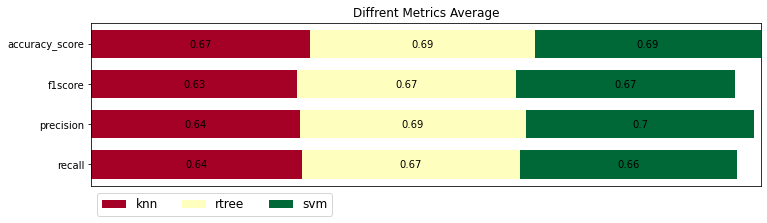

In [61]:
category_names = names
result_data = {"accuracy_score": test_acc, 'f1score':    test_f1, 'precision': test_pre, 'recall':    test_rec,  }

def survey(result_data, category_names):
    
    labels = list(result_data.keys())
    data = np.array(list(result_data.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0, 1, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 3))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
   

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.7,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color =  'k'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(np.around(c,decimals = 2)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, -0.22),
              loc='lower left', fontsize='large')
    ax.set_title('Diffrent Metrics Average', loc='center')
    fig.savefig('fname_macro2', dpi=300)
    return fig, ax


survey(result_data, category_names)
plt.savefig('skenario_4_accuracy.png', dpi=300)
plt.show()

In [62]:
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [63]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

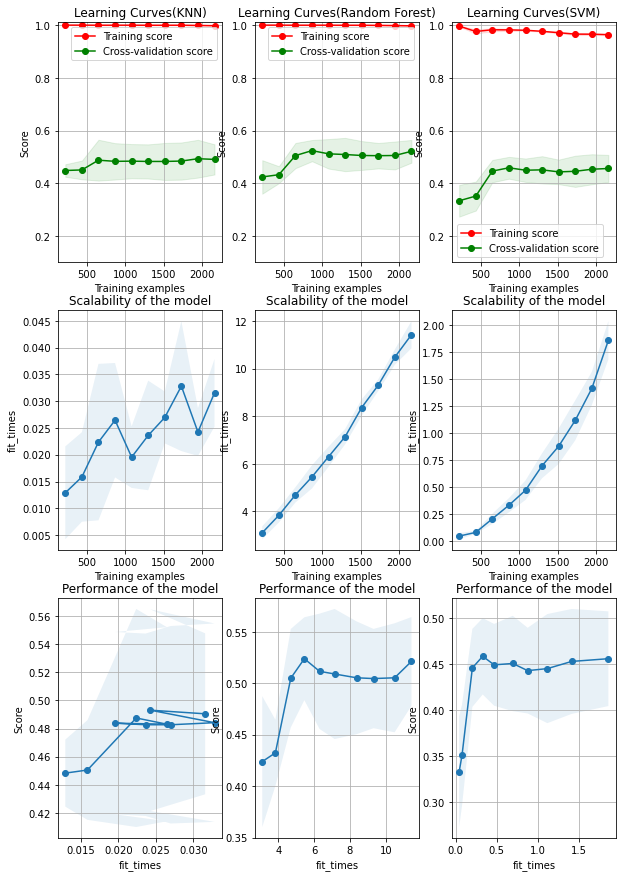

Wall time: 2min 13s


In [64]:
%%time
fig, axes = plt.subplots(3, 3, figsize=(10, 15))
cv = 5
# use models tuple which already made with optimized hyper-parameters
title = "Learning Curves(KNN)"
plot_learning_curve(models[0][1], title,  scaled_X, Y, axes=axes[:,0], ylim=(0.1, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves(Random Forest)"
plot_learning_curve(models[1][1], title,  scaled_X, Y, axes=axes[:,1], ylim=(0.1, 1.01),  cv=cv, n_jobs=4)

title = "Learning Curves(SVM)"
plot_learning_curve(models[2][1], title,  scaled_X, Y, axes=axes[:,2], ylim=(0.1, 1.01),  cv=cv, n_jobs=4)

plt.savefig('skenario_4_learningcurve.png', dpi=300)
plt.show()

In [65]:
blind.head()

,Facies,Formation,Well Name,Depth,GR,ILD,DeltaPHI,PHIND,PE,NM_M,...,4_PE,5_PE,6_PE,7_PE,8_PE,9_PE,Facies_Labels,KNN_Prediction,RF_Prediction,SVM_Prediction
2297,3,A1 SH,NEWBY,2826.0,76.34,5.236004,7.8,11.00,3.7,1,...,1.308333,0.519875,13.69,0.073046,2.616666,0.382166,FSiS,3,3,3
2298,3,A1 SH,NEWBY,2826.5,83.74,4.875285,9.7,12.55,3.4,1,...,1.223775,0.542326,11.56,0.086505,2.447551,0.408572,FSiS,2,2,2
2299,3,A1 SH,NEWBY,2827.0,83.19,4.613176,10.1,11.95,3.4,1,...,1.223775,0.542326,11.56,0.086505,2.447551,0.408572,FSiS,2,2,2
2300,3,A1 SH,NEWBY,2827.5,80.44,4.446313,10.1,11.15,3.4,1,...,1.223775,0.542326,11.56,0.086505,2.447551,0.408572,FSiS,2,2,2
2301,3,A1 SH,NEWBY,2828.0,75.42,4.446313,9.3,11.45,3.3,1,...,1.193922,0.550482,10.89,0.091827,2.387845,0.418788,FSiS,2,2,3


In [66]:
# Data Input
X_blind = blind[['GR', 'ILD', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'GR_clipped',
                 '1_GR', '3_GR', '5_GR',
                 '2_ILD', '4_ILD',
                 '3_PHIND', '4_PHIND',
                 '2_PE', '4_PE', '6_PE']]

# Data Output
Y_blind = blind['Facies']

In [67]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
scaled_X_blind = imp.fit_transform(X_blind)

In [68]:
from sklearn.preprocessing import StandardScaler

# Menskalakan ke variansi (Standardisation)
sc = StandardScaler()
scaled_X_blind = sc.fit_transform(X_blind)

In [69]:
# from sklearn.preprocessing import MinMaxScaler

# # Menskalakan nilai data ke dalam suatu range (Normalisation)
# mc = MinMaxScaler(feature_range=(0, 1))
# scaled_X_blind = mc.fit_transform(X_blind)

In [70]:
scaled_X_blind = pd.DataFrame(scaled_X_blind, columns=X.columns)
scaled_X_blind.describe()

,GR,ILD,DeltaPHI,PHIND,PE,NM_M,GR_clipped,1_GR,3_GR,5_GR,2_ILD,4_ILD,3_PHIND,4_PHIND,2_PE,4_PE,6_PE
count,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02
mean,2.008533e-16,-1.073056e-16,4.455579e-17,1.350012e-16,1.096735e-15,4.004476e-16,6.163326e-17,4.996004e-16,-3.663976e-16,-3.663976e-16,-1.112021e-16,2.443450e-16,-1.980657e-16,-2.222844e-16,-4.846135e-16,-1.520862e-15,4.472065e-17
std,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00
min,-1.393897e+00,-1.334873e+00,-2.992990e+00,-1.819766e+00,-1.852867e+00,-1.265355e+00,-1.756688e+00,-1.219839e+00,-1.652601e+00,-1.652601e+00,-1.621757e+00,-1.949413e+00,-1.807986e+00,-3.311819e+00,-1.977568e+00,-2.110201e+00,-1.626874e+00
25%,-6.736196e-01,-6.763028e-01,-5.890175e-01,-7.367318e-01,-8.994579e-01,-1.265355e+00,-8.175416e-01,-5.985457e-01,-6.258802e-01,-6.258802e-01,-6.793213e-01,-6.567142e-01,-6.981850e-01,-6.382212e-01,-9.050463e-01,-9.082920e-01,-8.819237e-01
50%,-1.200100e-02,-2.653955e-01,-1.568512e-02,-1.317941e-01,-1.367308e-01,7.902920e-01,4.512191e-02,-3.799766e-01,-3.335384e-01,-3.335384e-01,-1.879928e-01,-9.616358e-02,-1.891458e-01,8.663979e-02,-1.044311e-01,-7.135766e-02,-1.980346e-01
75%,3.189572e-01,4.255620e-01,6.179981e-01,5.512002e-01,6.259963e-01,7.902920e-01,4.766478e-01,4.391679e-01,5.974810e-01,5.974810e-01,5.370412e-01,6.302643e-01,5.226166e-01,6.906906e-01,6.539561e-01,6.795778e-01,5.640134e-01
max,7.299152e+00,3.567031e+00,2.197177e+00,3.907629e+00,2.342132e+00,7.902920e-01,3.526447e+00,4.304109e+00,3.567454e+00,3.567454e+00,3.027438e+00,2.534993e+00,4.457150e+00,2.398258e+00,2.235168e+00,2.131286e+00,2.564389e+00


In [71]:
# define Classifiers with hyper params

knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
rtree = RandomForestClassifier(criterion='gini', max_depth=15, n_estimators=500)
svm = SVC(C=10, gamma=1, kernel='rbf')

In [72]:
from sklearn.metrics import accuracy_score

knn.fit(scaled_X,Y)
y_hat_knn = knn.predict(scaled_X_blind)
blind['KNN_Prediction'] = y_hat_knn   #add to df
acc_knn = (accuracy_score(Y_blind, y_hat_knn ))

rtree.fit(scaled_X,Y)
y_hat_rtree = rtree.predict(scaled_X_blind)
blind['RF_Prediction'] = y_hat_rtree   #add to df
acc_rtree = (accuracy_score(Y_blind, y_hat_rtree ))

svm.fit(scaled_X,Y)
y_hat_svm = svm.predict(scaled_X_blind)
blind['SVM_Prediction'] = y_hat_svm   #add to df
acc_svm = (accuracy_score(Y_blind, y_hat_svm ))

<ipython-input-72-90c0c00c53e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blind['KNN_Prediction'] = y_hat_knn   #add to df
<ipython-input-72-90c0c00c53e2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blind['RF_Prediction'] = y_hat_rtree   #add to df
<ipython-input-72-90c0c00c53e2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [73]:
#create dataframe to compare accuracy results
d = { 'model':['knn', 'rtree', 'svm'],
      'test_score':[test_acc[0], test_acc[1],test_acc[2]],
      'blind_score': [acc_knn, acc_rtree, acc_svm]}

df_comp = pd.DataFrame(d)
round(df_comp,2)

,model,test_score,blind_score
0,knn,0.67,0.45
1,rtree,0.69,0.47
2,svm,0.69,0.37


In [74]:
import matplotlib.colors as colors
def compare_all_facies(logs, Pred1, Pred2, Pred3, facies_colors):
    facies_colors = ['#F4D03F', '#F5B041','#DC7633', '#A569BD','#6E2C00','#1B4F72','#2E86C1', '#AED6F1', '#196F3D']
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[Pred1].values,1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs[Pred2].values,1), 100, 1)
    cluster4 = np.repeat(np.expand_dims(logs[Pred3].values,1), 100, 1)
    
   
    f, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 12))

    im1 = ax[0].imshow(cluster1, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[1].imshow(cluster2, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im3 = ax[2].imshow(cluster3, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im4 = ax[3].imshow(cluster4, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    
    
    
    divider = make_axes_locatable(ax[3])
    cax = divider.append_axes("right", size="10%", pad=0.05)
    cbar=plt.colorbar(im4, cax=cax)
    cbar.set_label((15*' ').join([' SS ', 'CSiS', 'FSiS','SiSh', ' MS ', ' WS ', ' D  ', ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-4):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=2)
    
    ax[0].set_xlabel('True_Facies'); ax[1].set_xlabel(Pred1); ax[2].set_xlabel(Pred2)
    ax[3].set_xlabel(Pred3)

    
    #ax[0].set_yticklabels([]) ;
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]) 
    
    
    ax[0].set_xticklabels([]); ax[1].set_xticklabels([]); ax[2].set_xticklabels([])
    ax[3].set_xticklabels([])
    

    f.suptitle('Various model predictions in well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

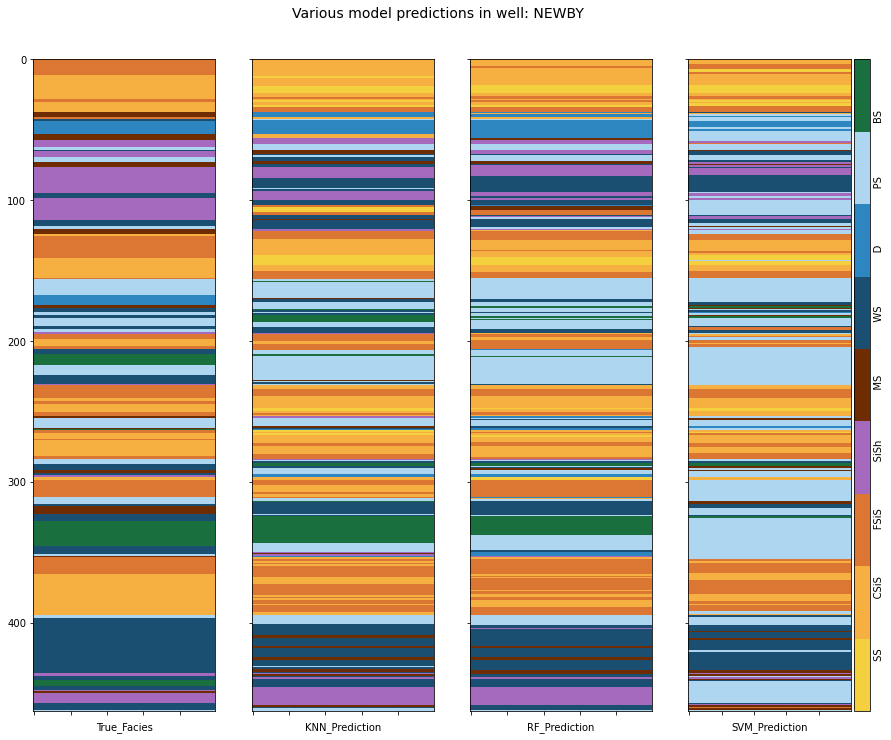

In [75]:
compare_all_facies(blind, 'KNN_Prediction', 'RF_Prediction', 'SVM_Prediction', facies_colors)

plt.savefig('skenario_4_result.png', dpi=300)
plt.show()

In [76]:
from sklearn.metrics import confusion_matrix
import itertools

# define function to implement confusion matrix with normalization capability

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     plt.savefig('conf20', dpi=300)

Confusion matrix, without normalization


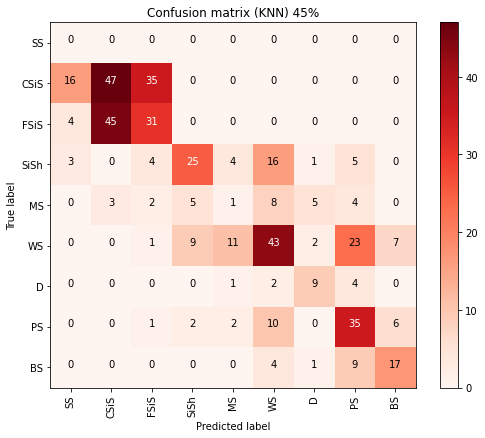

Wall time: 2.12 s


In [81]:
%%time
# create KNN model with optimom hyper-parameters
model_log=KNeighborsClassifier(n_neighbors=10, weights='distance')
model_log.fit(scaled_X,Y)
# predict test labels
y_pred_log = model_log.predict(scaled_X_blind)

#calculate confusion matrix
cnf_log = confusion_matrix(Y_blind, y_pred_log)

#Plot confusion matrix for KNN
fig = plt.figure()
fig.set_size_inches(7.4, 6, forward=False)
plot_confusion_matrix(cnf_log, classes=np.asarray(facies_labels),
                      title='Confusion matrix (KNN) 45%')

plt.savefig('skenario_4_KNN.png', dpi=300)
plt.show()

Confusion matrix, without normalization


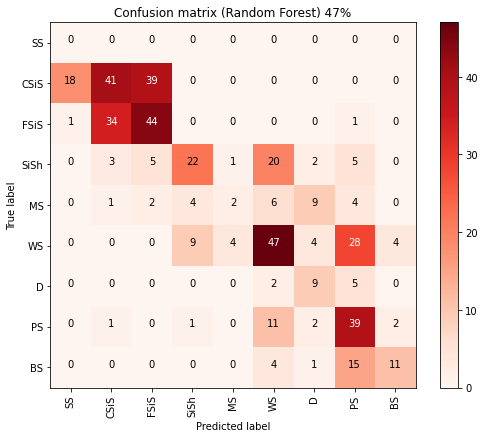

Wall time: 11.3 s


In [82]:
%%time
# create Random Forest model with optimom hyper-parameters
model_log=RandomForestClassifier(criterion='gini', max_depth=15, n_estimators=500)
model_log.fit(scaled_X,Y)
# predict test labels
y_pred_log = model_log.predict(scaled_X_blind)

#calculate confusion matrix
cnf_log = confusion_matrix(Y_blind, y_pred_log)

#Plot confusion matrix for RandomForest classifier
fig = plt.figure()
fig.set_size_inches(7.4, 6, forward=False)
plot_confusion_matrix(cnf_log, classes=np.asarray(facies_labels),
                      title='Confusion matrix (Random Forest) 47%')

plt.savefig('skenario_4_RF.png', dpi=300)
plt.show()

Confusion matrix, without normalization


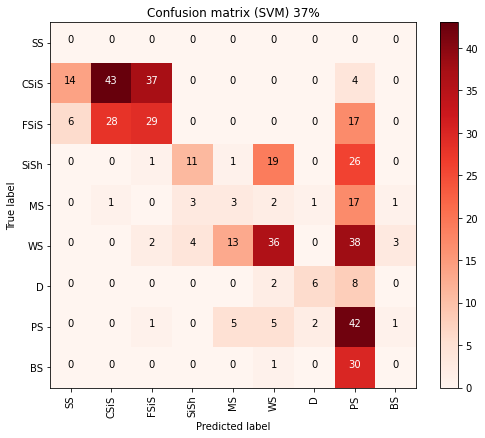

Wall time: 3.41 s


In [83]:
%%time
# create SVM model with optimom hyper-parameters
model_log=SVC(C=10, gamma=1, kernel='rbf')
model_log.fit(scaled_X,Y)
# predict test labels
y_pred_log = model_log.predict(scaled_X_blind)

#calculate confusion matrix
cnf_log = confusion_matrix(Y_blind, y_pred_log)

#Plot confusion matrix for SVM
fig = plt.figure()
fig.set_size_inches(7.4, 6, forward=False)
plot_confusion_matrix(cnf_log, classes=np.asarray(facies_labels),
                      title='Confusion matrix (SVM) 37%')

plt.savefig('skenario_4_SVM.png', dpi=300)
plt.show()